In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.652761,0.585961,0.217131,0.231681,0.237406,0.242366,0.248550,0.254401,...,0.194577,0.061774,0.002893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.839551
1,2,6.894754e-06,0.637669,0.567255,0.233053,0.237738,0.243539,0.253049,0.269959,0.290678,...,0.290489,0.243373,0.138753,0.026025,0.000082,0.000000,0.000000,0.000000,0.000000,0.839112
2,3,1.522987e-05,0.618939,0.593451,0.230064,0.235179,0.238921,0.244624,0.253568,0.264863,...,0.293000,0.311454,0.327319,0.332765,0.320059,0.235222,0.071360,0.000003,0.000000,0.708324
3,4,2.800000e-05,0.603397,0.567911,0.247432,0.261971,0.276777,0.293067,0.308447,0.321944,...,0.342768,0.350213,0.348947,0.332362,0.289878,0.229583,0.131521,0.025530,0.000000,0.804488
4,5,4.366489e-05,0.578792,0.622709,0.162069,0.184092,0.207671,0.231210,0.252201,0.275472,...,0.367511,0.386961,0.386825,0.383699,0.377212,0.366668,0.330829,0.254856,0.106434,0.790522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4.869946e-07,0.337896,0.430799,0.505749,0.515550,0.523766,0.530530,0.536435,0.541813,...,0.552288,0.557040,0.561669,0.566328,0.570892,0.574783,0.573678,0.555323,0.466563,0.908739
96,97,2.743041e-07,0.343549,0.432106,0.505637,0.516197,0.524625,0.531320,0.537488,0.542702,...,0.552225,0.555946,0.559739,0.563832,0.567975,0.571904,0.570581,0.553858,0.466316,0.908835
97,98,1.221970e-07,0.334070,0.433244,0.513090,0.524210,0.533241,0.540451,0.546880,0.551607,...,0.559605,0.562848,0.566992,0.571376,0.575087,0.576316,0.571000,0.542995,0.440441,0.910829
98,99,3.085853e-08,0.327480,0.429562,0.504450,0.514172,0.523044,0.530617,0.537114,0.543142,...,0.553810,0.558853,0.563396,0.568095,0.573180,0.576421,0.573721,0.546778,0.439851,0.909002


(0.3, 0.6)

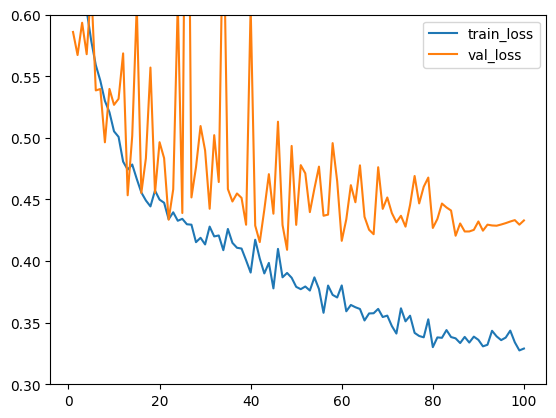

In [9]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.6)

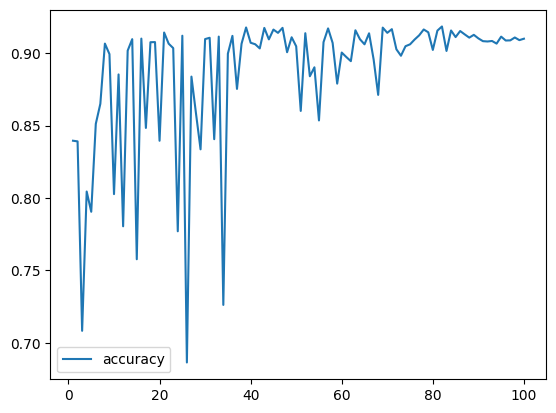

In [10]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

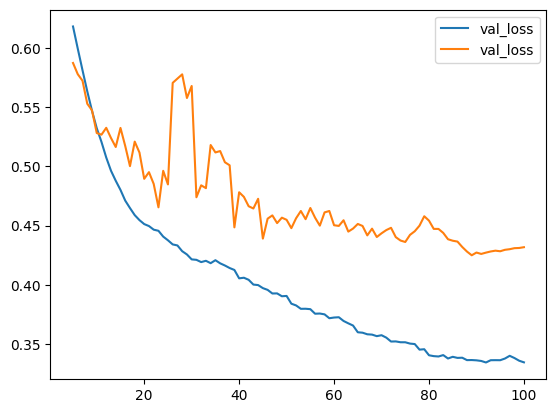

In [11]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(100, 16)


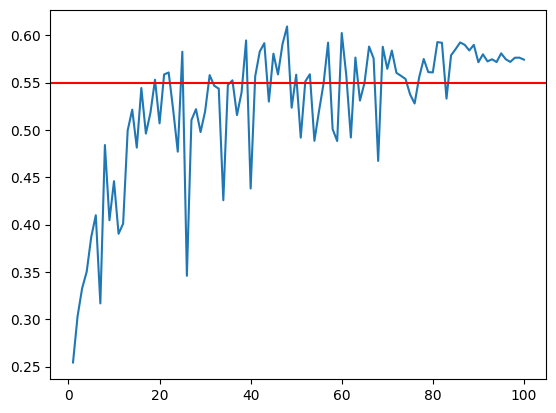

In [12]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

# put horizontal line at 0.55
plt.axhline(y=0.55, color='r', linestyle='-')


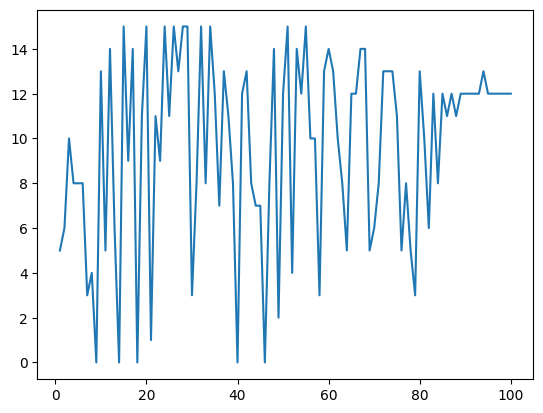

In [13]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")